In [13]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [14]:
train_data_dir = 'dataset/Train'
test_data_dir = 'dataset/Test'
validation_data_dir = 'dataset/Validation'

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest',
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (128,128),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

validation_generator = val_datagen.flow_from_directory(validation_data_dir,
                                                       target_size = (128,128),
                                                       batch_size = 32,
                                                       class_mode = 'binary')





Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

c:\Users\ANUSANTH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [22]:
history = model.fit(train_generator,
          steps_per_epoch = len(train_generator),
          epochs = 20,
          validation_data = validation_generator,
          validation_steps = len(validation_generator))


print(history.history['accuracy'])
print(history.history['val_accuracy'])


print(history.history['loss'])
print(history.history['val_loss'])



Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 182s 576ms/step - accuracy: 0.8520 - loss: 0.3277 - val_accuracy: 0.9725 - val_loss: 0.0943
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 449ms/step - accuracy: 0.9255 - loss: 0.2033 - val_accuracy: 0.9362 - val_loss: 0.1448
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 357ms/step - accuracy: 0.9397 - loss: 0.1616 - val_accuracy: 0.9737 - val_loss: 0.0875
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 111s 354ms/step - accuracy: 0.9418 - loss: 0.1660 - val_accuracy: 0.9750 - val_loss: 0.0880
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 359ms/step - accuracy: 0.9473 - loss: 0.1475 - val_accuracy: 0.9700 - val_loss: 0.0896
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 358ms/step - accuracy: 0.9498 - loss: 0.1518 - val_accuracy: 0.9775 - val_loss: 0.0693
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 111s 353ms/step - accuracy: 0.9515 - loss: 0.1377 - val_accuracy: 0.9775 - val_loss: 0.0807
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 358ms/step - accuracy: 0.9574 -

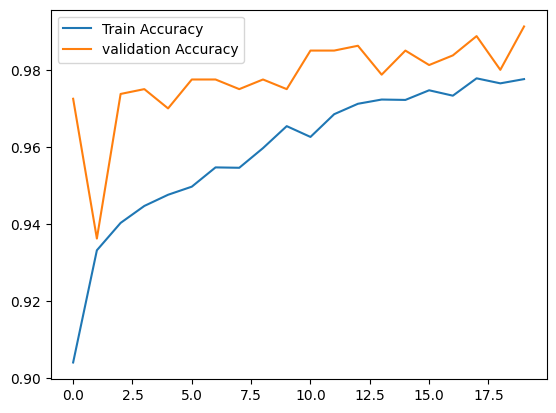

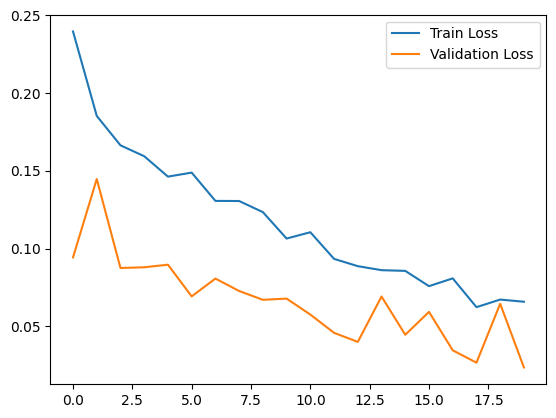

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.legend()
plt.show()



plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy: ",test_acc)

31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.9894 - loss: 0.0261
Test Accuracy:  0.9838709831237793


In [25]:
model.save('face_mask_detection_model.h5')
